<a href="https://colab.research.google.com/github/Kaavyesh/oasis_infobyte_task-2/blob/main/Task_2_Unemployement_analysis_oasis_infobyte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
path = '/content/drive/MyDrive/oasis infobyte /Unemployment_Rate_upto_11_2020.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
new_column_names = {
    'Region': 'State',
    'Date': 'Date',
    'Frequency': 'Frequency',
    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate',
    'Region.1': 'Region',
    'longitude': 'Longitude',
    'latitude': 'Latitude'
}

# Remove extra white spaces in column names
df.columns = df.columns.str.strip()

# Use the rename method to change the column names
df.rename(columns=new_column_names, inplace=True)


In [ ]:
df.head()

,State,Date,Frequency,Unemployment Rate,Employed,Labour Participation Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

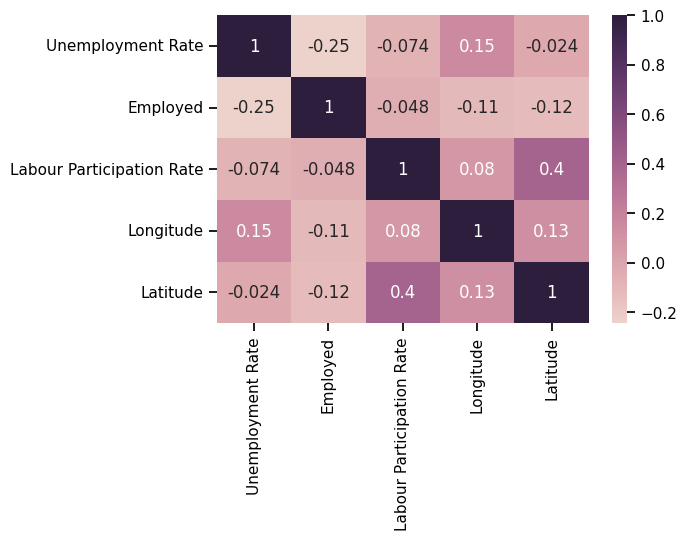

In [ ]:
hm = df[[ 'Unemployment Rate', 'Employed',
       'Labour Participation Rate', 'Longitude', 'Latitude']]
hm = hm.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=hm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

In [ ]:

fig = px.box(df, x='State', y='Unemployment Rate', color='State', title='Unemployment rate per State', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
plot_unemp = df[['Unemployment Rate','State']]
df_unemployed = plot_unemp.groupby('State').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Unemployment Rate')

fig = px.bar(df_unemployed, x='State',y='Unemployment Rate',color = 'State',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

In [ ]:
df.columns

Index(['State', 'Date', 'Frequency', 'Unemployment Rate', 'Employed',
       'Labour Participation Rate', 'Region', 'Longitude', 'Latitude'],
      dtype='object')

In [ ]:
unemployed_df = df[['State', 'Region', 'Unemployment Rate', 'Employed', 'Labour Participation Rate']]

unemployed = unemployed_df.groupby(['Region', 'State'])['Unemployment Rate'].mean().reset_index()

# Creating a Sunburst chart
fig = px.sunburst(unemployed, path=['Region', 'State'], values='Unemployment Rate', color_continuous_scale='rdylbu',
                  title='Unemployment rate in each Region and State', height=550, template='presentation')

fig.show()